# 📊 Laboratorio 8 - Visualización de Datos
## <font size=4> *CC3084 - Data Science*, 2024 </font>
## <font size=3 color='gray'> Samuel Chamale y Adrian Rodriguez</font>

<div class="alert alert-block alert-warning">
<b>Nota:</b> Al utilizar visualizaciones dinámicas con Plotly, la previsualización no es posible. Es por eso que decidimos incluir imagenes de los resultados para evitar al calificador la ejecución del notebook.
</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

---

## 1. Emisiones Históricas de CO₂ 🌍

### a) Exploración de los Datos 📈

Comenzamos cargando y explorando el conjunto de datos historical_emissions.csv, que contiene las emisiones históricas de CO₂ a nivel mundial desde 1990 hasta 2018.

In [2]:
# Cargar los datos
emissions_df = pd.read_csv('data/emissions/historical_emissions.csv')

# Mostrar las primeras filas
emissions_df.head()

,Country,Data source,Sector,Gas,Unit,2018,2017,2016,2015,2014,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
0,World,CAIT,Total including LUCF,CO2,MtCO₂e,36441.55,35588.70,35160.60,34521.91,34558.59,...,24957.30,24895.32,25292.92,24214.92,23890.22,23260.29,23124.00,22988.29,23056.40,22849.92
1,China,CAIT,Total including LUCF,CO2,MtCO₂e,9663.36,9367.67,9164.21,9120.27,9184.77,...,2799.84,2882.75,2779.27,2715.50,2735.48,2414.50,2294.12,2068.77,1952.78,1823.96
2,United States,CAIT,Total including LUCF,CO2,MtCO₂e,4749.57,4581.90,4656.84,4563.52,4683.35,...,5191.66,5172.06,5129.29,4864.46,4708.31,4654.52,4581.76,4461.62,4389.50,4426.40
3,European Union (27),CAIT,Total including LUCF,CO2,MtCO₂e,2636.99,2692.12,2669.54,2321.61,2263.78,...,3079.46,3134.03,3142.23,3210.93,3113.68,3060.09,3072.40,3133.06,3247.48,3286.44
4,India,CAIT,Total including LUCF,CO2,MtCO₂e,2400.25,2267.16,2149.01,2085.38,2072.03,...,683.00,618.73,600.38,555.60,519.98,466.79,431.31,409.09,386.17,341.32


### b) Mensaje Clave 📌

Queremos mostrar la tendencia de las emisiones mundiales de CO₂ desde 1990 hasta 2018, destacando los eventos globales clave que pueden haber influido en el comportamiento de las emisiones y resaltando el incremento porcentual desde el primer año hasta el último.

### c) Tipo de Gráfica Elegida 📊

Optamos por un gráfico de líneas interactivo que muestre la evolución anual de las emisiones de CO₂. Esto permite una clara visualización de la tendencia a lo largo del tiempo, con la capacidad de explorar hitos importantes y el incremento porcentual acumulado.

### d) Creación de la Gráfica en Python 🖥️

In [3]:
# Preparar los datos
years = list(map(int, emissions_df.columns[5:]))  # Columnas de años
emissions = emissions_df.iloc[0, 5:].astype(float)  # Emisiones para 'World'

# Definir hitos clave
hitos = {
    1997: 'Protocolo de Kioto en Vigor',
    2008: 'Crisis Financiera Global',
    2015: 'Acuerdo de París'
}

# Crear el gráfico de líneas con Plotly Express
fig = px.line(x=years, y=emissions,
              labels={'x': 'Año', 'y': 'Emisiones de CO₂ (MtCO₂e)'},
              title='Evolución de las Emisiones Mundiales de CO₂ (1990-2018)',
              markers=True)

# Añadir los hitos como anotaciones sin afectar la leyenda
for year, label in hitos.items():
    emission_value = emissions[years.index(year)]
    fig.add_annotation(
        x=year,
        y=emission_value,
        text=label,
        showarrow=True,
        arrowhead=0,
        ax=0,
        ay=-50,
        font=dict(size=12, color="black"),
        arrowcolor="orange"
    )

# Optimizar la gráfica
fig.update_layout(
    template='plotly_white',
    hovermode='x unified',
    showlegend=False  # Ocultar el botón de leyenda a la derecha
)

# Cálculo del incremento porcentual
incremento = abs((emissions.iloc[-1] - emissions.iloc[0]) / emissions.iloc[0]) * 100
incremento_texto = f"{incremento:.2f}% ↑"

last_idx = len(emissions) - 1

# Añadir línea vertical en el último año (2018), que vaya desde el mínimo hasta el máximo de las emisiones
fig.add_shape(
    type="line",
    x0=years[0], y0=emissions.iloc[0],  # Desde el valor del primer año
    x1=years[0], y1=emissions.iloc[-1],  # Hasta el valor del último año
    line=dict(color="green", width=2, dash="dash")
)

# Añadir anotación con el incremento en el último punto con un fondo blanco
fig.add_annotation(
    x=years[0],
    y=emissions.iloc[14],
    text=incremento_texto,  # Texto con el porcentaje y la flecha hacia arriba
    showarrow=False,
    arrowhead=0,
    ax=-80,  # Ajuste de la posición de la flecha hacia la izquierda
    ay=0,
    font=dict(size=12, color="green"),
    bgcolor="white",  # Fondo blanco para evitar traslape visual
    bordercolor="white",
    borderwidth=1
)



fig.show()

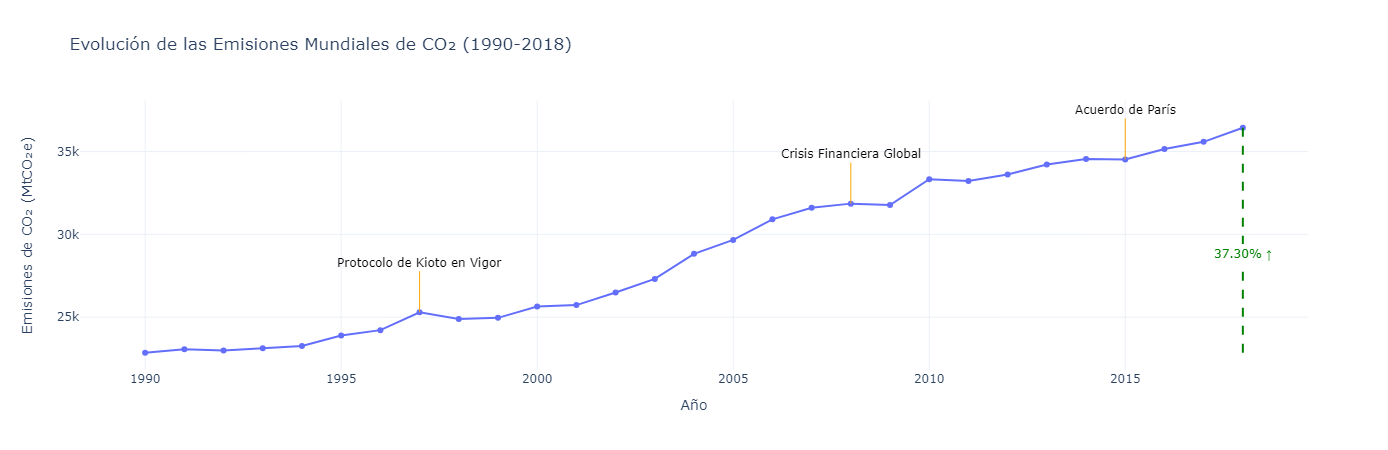

### e) Optimización de la Gráfica para Reducir la Carga Cognitiva 🧠

- **Etiquetas y colores claros**: Se utilizaron etiquetas claras y un color verde para la línea de incremento, evitando distracciones visuales.
- **Anotaciones para eventos clave**: Se añadieron hitos como el Protocolo de Kioto, la Crisis Financiera Global y el Acuerdo de París, facilitando la contextualización de los cambios en la serie temporal.
- **Interactividad**: La gráfica es interactiva, permitiendo al usuario explorar datos específicos en los puntos de interés y obtener detalles precisos.

### f) Explicación de Decisiones 💡

La elección de un gráfico de líneas fue motivada por la necesidad de mostrar una tendencia a lo largo del tiempo y facilitar la identificación de patrones y cambios en las emisiones de CO₂. Al incorporar eventos clave mediante anotaciones y un cálculo del incremento porcentual acumulado, los usuarios pueden interpretar mejor el contexto y la magnitud del cambio en las emisiones globales. La adición de un fondo blanco en el texto del incremento ayuda a evitar el traslape visual con la línea de incremento, mejorando la legibilidad de la información.

---

## 2. Títulos de Netflix 📺

### a) Exploración de los Datos 🔍

El conjunto de datos `netflix_titles.csv` contiene información sobre los títulos disponibles en Netflix, incluyendo películas y series, con detalles como género, país de origen, año de lanzamiento, etc.

In [4]:
# Cargar los datos
netflix_df = pd.read_csv('data/netflix/netflix_titles.csv')

# Mostrar las primeras filas
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### b) Mensaje Clave 📌

Queremos visualizar la distribución jerárquica de géneros en Netflix para entender cómo se categorizan los títulos y cuáles son los géneros predominantes dentro de cada categoría principal.

### c) Tipo de Gráfica Elegida 📊

Optamos por un **gráfico de Sankey** que permite representar las relaciones entre géneros principales y sus subgéneros más destacados de manera clara y eficiente. Este tipo de visualización facilita la identificación de las conexiones y flujos entre las categorías, destacando los géneros más relevantes sin sobrecargar la gráfica.

### d) Creación de la Gráfica en Python 🖥️

In [5]:
# Dividir los géneros en principales y secundarios
netflix_df['Primary Genre'] = netflix_df['listed_in'].str.split(', ').str[0]
netflix_df['Secondary Genre'] = netflix_df['listed_in'].str.split(', ').str[1]

# Contar la cantidad de títulos por género principal y secundario
genre_hierarchy = netflix_df.groupby(['Primary Genre', 'Secondary Genre']).size().reset_index(name='Count')

# Filtrar para incluir solo los géneros principales prominentes
threshold = 750  # Ajustar según la cantidad de datos para seleccionar géneros prominentes
prominent_genres = genre_hierarchy.groupby('Primary Genre')['Count'].sum()
prominent_genres = prominent_genres[prominent_genres >= threshold].index

# Filtrar los datos para mostrar solo los géneros prominentes
filtered_genre_hierarchy = genre_hierarchy[genre_hierarchy['Primary Genre'].isin(prominent_genres)]

# Seleccionar solo los 3 géneros secundarios más relevantes para cada género principal
top_secondary_genres = (
    filtered_genre_hierarchy.groupby('Primary Genre')
    .apply(lambda x: x.nlargest(3, 'Count'))
    .reset_index(drop=True)
)

# Crear listas de nodos y enlaces para el diagrama de Sankey
all_genres = pd.concat([top_secondary_genres['Primary Genre'], top_secondary_genres['Secondary Genre']]).unique()
genre_index = {genre: i for i, genre in enumerate(all_genres)}

# Listas de nodos y links
source = top_secondary_genres['Primary Genre'].map(genre_index).tolist()
target = top_secondary_genres['Secondary Genre'].map(genre_index).tolist()
value = top_secondary_genres['Count'].tolist()

# Crear el diagrama de Sankey
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=list(genre_index.keys())
    ),
    link=dict(
        source=source,
        target=target,
        value=value
    ))])

fig.update_layout(title_text="Distribución de Géneros en Netflix: Géneros Principales y Subgéneros Destacados", font_size=10)
fig.show()

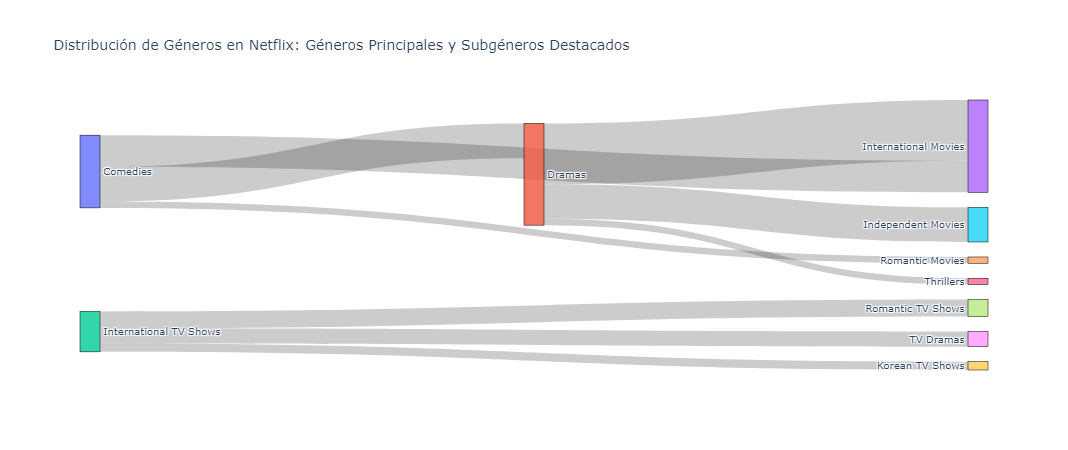


### e) Optimización de la Gráfica para Reducir la Carga Cognitiva 🧠

- **Selección de géneros prominentes**: Al filtrar solo los géneros principales con una cantidad significativa de títulos, se evita la saturación de información.
- **Top subgéneros relevantes**: Mostrar únicamente los 3 subgéneros más relevantes por cada género principal simplifica la visualización y resalta las categorías más importantes.
- **Colores diferenciados**: Utilizar una paleta de colores distintiva para los nodos ayuda a distinguir fácilmente entre géneros principales y secundarios.
- **Interactividad**: Permite a los usuarios explorar las conexiones entre géneros de manera dinámica, facilitando la comprensión de la distribución.
- **Etiquetas claras y concisas**: Aseguran que la información sea fácilmente legible sin sobrecargar la gráfica.

### f) Explicación de Decisiones 💡

El gráfico de Sankey es ideal para representar flujos y relaciones entre categorías, en este caso, entre géneros principales y sus subgéneros más destacados en Netflix. Al optar por Sankey en lugar de un diagrama de Sunburst (el cual fue nuestra primera opción), logramos una representación más clara de las conexiones y la magnitud de cada relación, especialmente cuando se filtran los géneros prominentes y sus subcategorías más relevantes. Esta elección mejora la legibilidad y facilita la identificación de los géneros más comunes y cómo se subdividen, manteniendo la claridad y reduciendo la carga cognitiva para el usuario. Además, la interactividad del gráfico de Sankey permite una exploración más dinámica de los datos, lo que enriquece la experiencia de análisis.

---

## 3. Ventas de Productos 🚚

### a) Exploración de los Datos 📊

El archivo `train.csv` contiene información sobre pedidos de clientes, incluyendo detalles como fecha de pedido, modo de envío, categoría de producto y ventas.

In [6]:
# Cargar los datos
train_df = pd.read_csv('data/superstone/train.csv')

# Mostrar las primeras filasa
train_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


### b) Mensaje Clave 📌

Queremos identificar cuál es la **distribución de las ventas en función de la categoría de producto** y **el segmento de clientes**. Esto ayudará a entender en qué segmentos y categorías se concentran las ventas, apoyando la toma de decisiones estratégicas en marketing y gestión de inventarios.

### c) Tipo de Gráfica Elegida 📊

Optamos por un **gráfico de barras agrupado** con Plotly para mostrar las ventas por categoría de producto en función de los segmentos de clientes (Consumidor, Corporativo, y Hogar). Este tipo de gráfico es claro y permite comparaciones precisas entre categorías y segmentos, respetando los principios de la Gestalt como **proximidad** y **similitud**.

### d) Creación de la Gráfica en Python 🖥️

In [7]:
import plotly.express as px

# Preparar los datos: sumar las ventas por categoría y segmento
sales_data = train_df.groupby(['Category', 'Segment'])['Sales'].sum().reset_index()

# Crear el gráfico de barras agrupado con etiquetas
fig = px.bar(
    sales_data,
    x='Category',
    y='Sales',
    color='Segment',
    barmode='group',
    title='Ventas por Categoría de Producto y Segmento de Cliente',
    labels={'Sales': 'Ventas Totales', 'Category': 'Categoría de Producto'},
    color_discrete_sequence=px.colors.qualitative.Plotly,
    text='Segment'  # Añadir etiquetas de segmento
)

# Optimizar el diseño y posicionar las etiquetas
fig.update_layout(
    xaxis_title='Categoría de Producto',
    yaxis_title='Ventas Totales',
    legend_title_text='Segmento de Cliente',
    template='plotly_white',
    width=800,
    height=500,
    showlegend=False
)

# Configurar las trazas para que muestren el texto (segmento) dentro de las barras
fig.update_traces(
    textposition='inside',
    textfont=dict(color='white'),  # Asegura que el texto sea legible
    # hovertemplate='<b>Segmento:</b> %{name}<br><b>Ventas:</b> %{y}<extra></extra>'
)

# Mostrar la gráfica
fig.show()

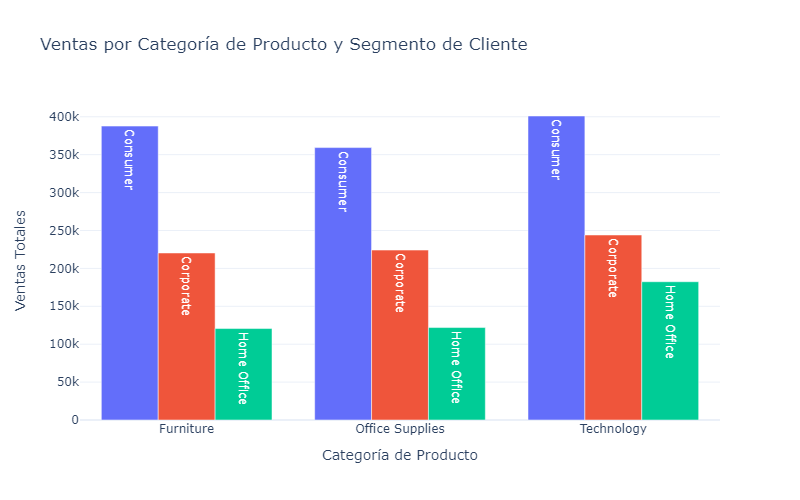

### e) Optimización de la Gráfica para Reducir la Carga Cognitiva 🧠

- **Gráfico de barras agrupado**: Facilita la comparación entre categorías de productos y segmentos de clientes en un formato claro y organizado.
- **Colores distintivos y consistentes**: Usamos una paleta de colores cualitativa de Plotly que proporciona un contraste adecuado sin ser visualmente abrumadora.
- **Interactividad**: La funcionalidad de Plotly permite explorar los valores específicos al pasar el cursor sobre cada barra, sin necesidad de sobrecargar el gráfico con etiquetas adicionales.
- **Diseño limpio**: Eliminamos distracciones visuales innecesarias, como bordes y cuadrículas pesadas, para que el espectador pueda concentrarse en la información clave.

### f) Explicación de Decisiones 💡

El **gráfico de barras agrupado** con Plotly permite ver la distribución de las ventas por categoría de producto y segmento de cliente de una manera clara y ordenada. Esta visualización facilita la comparación entre cada segmento dentro de las categorías, mostrando patrones de ventas relevantes que ayudan a identificar oportunidades estratégicas.

La elección de una paleta cualitativa y el agrupamiento de las barras permiten aplicar los principios de **proximidad** (las barras de cada categoría están agrupadas) y **similitud** (cada segmento está representado con un color consistente), lo que reduce la carga cognitiva y facilita la interpretación. La **interactividad** de Plotly permite que el usuario explore los datos más profundamente al pasar el cursor sobre cada barra, sin añadir etiquetas excesivas que puedan sobrecargar la visualización.

En resumen, esta gráfica con Plotly proporciona una visión precisa y accesible de la distribución de las ventas, permitiendo identificar rápidamente los segmentos y categorías más lucrativos de una manera intuitiva y visualmente atractiva.


---

## Ejercicios Adicionales

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sales = pd.read_csv('data/additional/Depuracion(ventas unitarias).csv')
emissions = pd.read_csv('data/emissions/historical_emissions.csv')

### a. Reducción de carga cognitiva

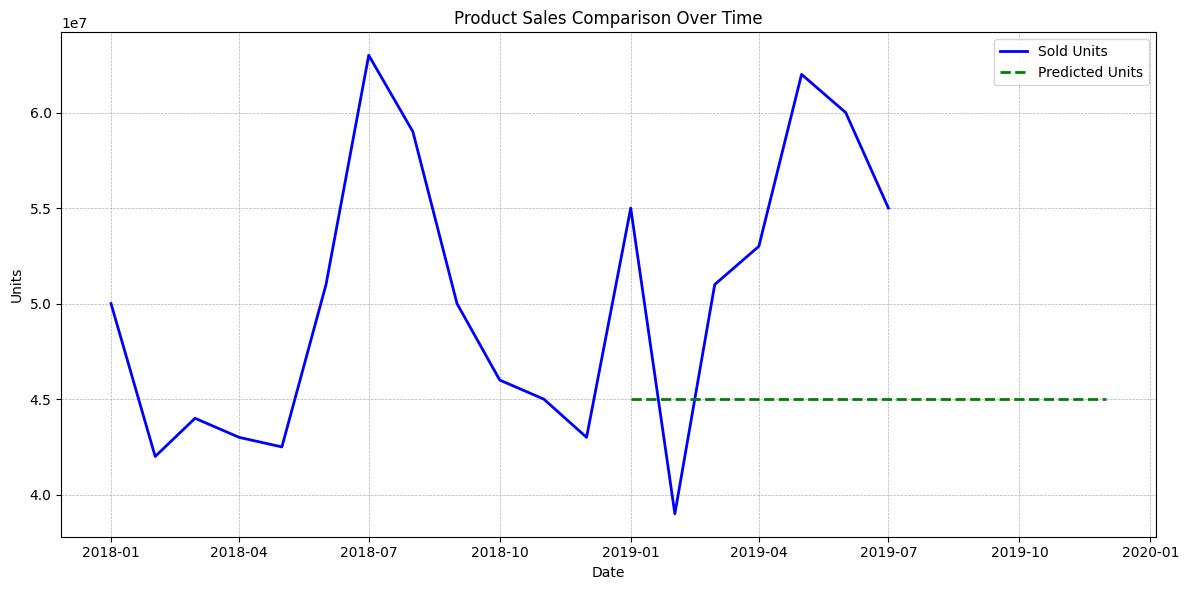

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

sales.columns = ['date', 'sold_units', 'predicted_units']
sales['date'] = pd.to_datetime(sales['date'], format='%b-%y')

plt.figure(figsize=(12, 6))
plt.plot(sales['date'], sales['sold_units'], label='Sold Units', color='blue', linewidth=2)
plt.plot(sales['date'], sales['predicted_units'], label='Predicted Units', color='green', linestyle='--', linewidth=2)

plt.title('Product Sales Comparison Over Time')
plt.xlabel('Date')
plt.ylabel('Units')
plt.legend()
plt.grid(True, which='major', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


💡 Usar gráficos de líneas en lugar de barras reduce la carga cognitiva al presentar los datos de manera simplificada. Las líneas permiten comparar fácilmente las tendencias de las unidades vendidas a lo largo del tiempo. Una menor cantidad de líneas de cuadrícula y una presentación ordenada contribuyen a una visualización más limpia y comprensible.

### b. Cree una visualización que demuestre al menos dos principios de la Gestalt.

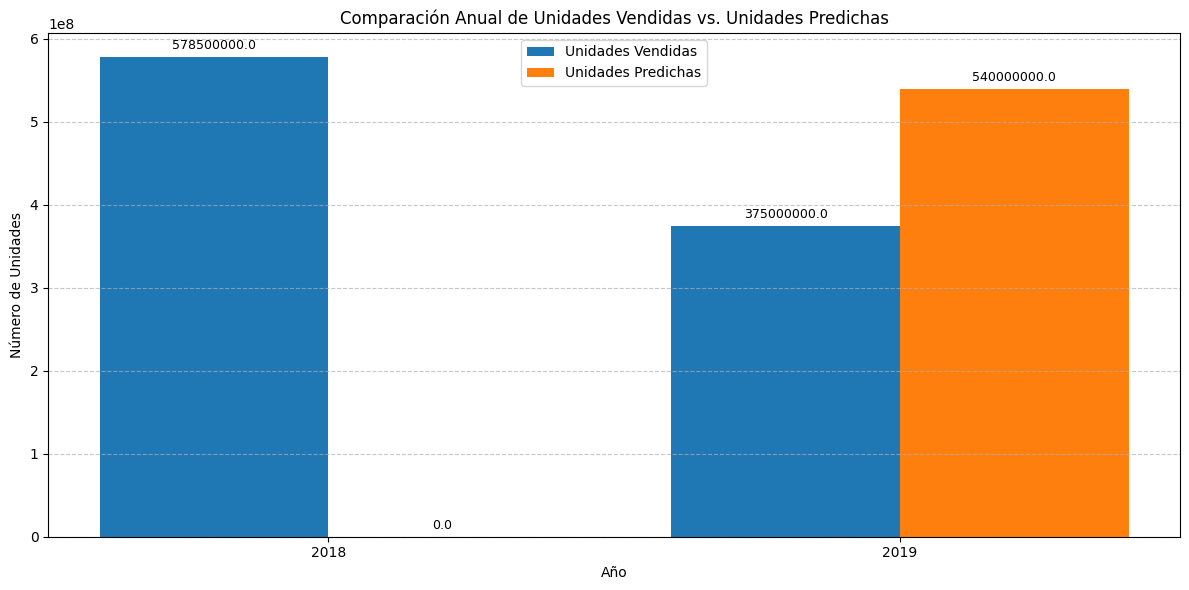

In [10]:
# Supongamos que ya tienes el DataFrame 'sales' configurado
sales.columns = ['date', 'sold_units', 'predicted_units']
sales['date'] = pd.to_datetime(sales['date'], format='%b-%y')

# Extraer el año de la fecha
sales['year'] = sales['date'].dt.year

# Agrupar los datos por año y sumar las unidades vendidas y predichas
sales_yearly = sales.groupby('year').agg({
    'sold_units': 'sum',
    'predicted_units': 'sum'
}).reset_index()

# Ordenar los datos por año
sales_yearly = sales_yearly.sort_values('year')

# Configuración del gráfico
plt.figure(figsize=(12, 6))

# Posición de las barras en el eje x
indices = np.arange(len(sales_yearly))
bar_width = 0.4

# Barras para unidades vendidas
plt.bar(indices - bar_width/2, sales_yearly['sold_units'], bar_width, label='Unidades Vendidas', color='#1f77b4')  # Azul más fuerte

# Barras para unidades predichas
plt.bar(indices + bar_width/2, sales_yearly['predicted_units'], bar_width, label='Unidades Predichas', color='#ff7f0e')  # Naranja más fuerte

# Configuración de etiquetas y título
plt.xlabel('Año')
plt.ylabel('Número de Unidades')
plt.title('Comparación Anual de Unidades Vendidas vs. Unidades Predichas')
plt.xticks(indices, sales_yearly['year'], rotation=0)
plt.legend()

# Añadir etiquetas de valor encima de las barras
for i in indices:
    plt.text(i - bar_width/2, sales_yearly['sold_units'][i] + max(sales_yearly['sold_units']) * 0.01,
             f"{sales_yearly['sold_units'][i]}", ha='center', va='bottom', fontsize=9)
    plt.text(i + bar_width/2, sales_yearly['predicted_units'][i] + max(sales_yearly['predicted_units']) * 0.01,
             f"{sales_yearly['predicted_units'][i]}", ha='center', va='bottom', fontsize=9)

# Mejorar el diseño
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()

--- 

## Crítica Constructiva

---

## Reflexiones